# Hochschule Bonn-Rhein-Sieg
### Scientific Experimentation and Evaluation, SS18
### Assignment 3

submitted by: `Abhishek Padalkar, Max Mensing, Pranjal Dhole`

## Packages

In [22]:
import numpy as np
from math import atan2

import pandas
import sys, os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sb

sys.path.append(os.getcwd())
%matplotlib inline

## Importing data

In [61]:
data = pandas.read_csv('data/motionData.csv', header=[0,1,2])
display(data.head(10))

,Straight Motion,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Right turn Motion,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Left turn Motion,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0
,Right wheel,Unnamed: 1_level_1,Left Wheel,Unnamed: 3_level_1,Right wheel,Unnamed: 5_level_1,Left Wheel,Unnamed: 7_level_1,Right wheel,Unnamed: 9_level_1,Left Wheel,Unnamed: 11_level_1
,x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm)
0,40.3,20.3,40.2,34.9,10.9,1.5,25.1,4.2,25.0,51.5,10.8,54.3
1,40.3,20.3,40.3,34.8,10.3,1.2,24.5,3.5,25.0,51.3,11.2,54.1
2,40.2,20.9,40.0,35.3,10.4,1.3,24.6,4.0,25.1,51.4,10.9,54.0
3,40.2,20.5,40.0,35.0,10.9,1.6,25.1,4.3,25.0,51.6,10.5,54.9
4,40.5,20.1,40.4,34.6,10.4,1.4,24.2,4.0,25.1,51.4,10.9,54.0
5,40.5,20.0,40.4,34.5,10.0,0.9,24.4,3.2,25.2,51.1,10.5,54.9
6,40.6,20.3,40.8,34.8,11.0,1.6,25.2,4.8,24.8,51.9,10.5,54.6
7,40.4,19.9,40.6,34.3,11.2,2.0,24.5,4.9,24.0,52.2,9.9,54.7


In [24]:
database = data.as_matrix()
data_array = database.copy()
straight_motion_data = data_array[:,0:4]
right_turn_data = data_array[:,4:8]
left_turn_data = data_array[:,8:12]

## Initial position of robot LED centers

In [25]:
# Starting position of robot LED centers
wheel_Rx0_s = 0.0
wheel_Ry0_s = 20.6
wheel_Lx0_s = 0.0
wheel_Ly0_s = 35.1

wheel_Rx0_r = 0.0
wheel_Ry0_r = 20.6
wheel_Lx0_r = 0.0
wheel_Ly0_r = 35.1

wheel_Rx0_l = 0.0
wheel_Ry0_l = 20.6
wheel_Lx0_l = 0.0
wheel_Ly0_l = 35.1

## Supposed distance to be travelled (correct from analytical calculations, if incorrect)

In [26]:
# supposed distance to be travelled by robot
s_rx0_distance = 40.5
s_ry0_distance = 0
s_lx0_distance = 40.5
s_ly0_distance = 0

r_rx0_distance = 10
r_ry0_distance = 20
r_lx0_distance = 25
r_ly0_distance = 30

l_rx0_distance = 25
l_ry0_distance = 30
l_lx0_distance = 10
l_ly0_distance = 20

## Final position

### Final position of robot LED centers

In [27]:
# Final position of robot LED centers
wheel_Rx_s = straight_motion_data[:,0]
wheel_Ry_s = straight_motion_data[:,1]
wheel_Lx_s = straight_motion_data[:,2]
wheel_Ly_s = straight_motion_data[:,3]

wheel_Rx_r = right_turn_data[:,0]
wheel_Ry_r = right_turn_data[:,1]
wheel_Lx_r = right_turn_data[:,2]
wheel_Ly_r = right_turn_data[:,3]

wheel_Rx_l = left_turn_data[:,0]
wheel_Ry_l = left_turn_data[:,1]
wheel_Lx_l = left_turn_data[:,2]
wheel_Ly_l = left_turn_data[:,3]

### Distance calculations

In [28]:
# Distance travelled by robot wheels
s_rx_distance = np.absolute(wheel_Rx_s - wheel_Rx0_s)
s_ry_distance = np.absolute(wheel_Ry_s - wheel_Ry0_s)
s_lx_distance = np.absolute(wheel_Lx_s - wheel_Lx0_s)
s_ly_distance = np.absolute(wheel_Ly_s - wheel_Ly0_s)

r_rx_distance = np.absolute(wheel_Rx_r - wheel_Rx0_r)
r_ry_distance = np.absolute(wheel_Ry_r - wheel_Ry0_r)
r_lx_distance = np.absolute(wheel_Lx_r - wheel_Lx0_r)
r_ly_distance = np.absolute(wheel_Ly_r - wheel_Ly0_r)

l_rx_distance = np.absolute(wheel_Rx_l - wheel_Rx0_l)
l_ry_distance = np.absolute(wheel_Ry_l - wheel_Ry0_l)
l_lx_distance = np.absolute(wheel_Lx_l - wheel_Lx0_l)
l_ly_distance = np.absolute(wheel_Ly_l - wheel_Ly0_l)

# Mean of distance travelled by wheels
s_rx_distance_mean = np.round(s_rx_distance.mean(), decimals=1)
s_ry_distance_mean = np.round(s_ry_distance.mean(), decimals=1)
s_lx_distance_mean = np.round(s_lx_distance.mean(), decimals=1)
s_ly_distance_mean = np.round(s_ly_distance.mean(), decimals=1)

r_rx_distance_mean = np.round(r_rx_distance.mean(), decimals=1)
r_ry_distance_mean = np.round(r_ry_distance.mean(), decimals=1)
r_lx_distance_mean = np.round(r_lx_distance.mean(), decimals=1)
r_ly_distance_mean = np.round(r_ly_distance.mean(), decimals=1)

l_rx_distance_mean = np.round(l_rx_distance.mean(), decimals=1)
l_ry_distance_mean = np.round(l_ry_distance.mean(), decimals=1)
l_lx_distance_mean = np.round(l_lx_distance.mean(), decimals=1)
l_ly_distance_mean = np.round(l_ly_distance.mean(), decimals=1)

In [29]:
# Radius of circle on which robot travels for left/right turn
radius = 22.8 # in cm

sx_mean =(s_rx_distance_mean + s_lx_distance_mean) / 2
rx_mean =(r_rx_distance_mean + r_lx_distance_mean) / 2
lx_mean =(l_rx_distance_mean + l_lx_distance_mean) / 2

sy_mean =(s_ry_distance_mean + s_ly_distance_mean) / 2
ry_mean =(r_ry_distance_mean + r_ly_distance_mean) / 2
ly_mean =(l_ry_distance_mean + l_ly_distance_mean) / 2

In [30]:
# Mean distance travelled by robot
s_mean = np.sqrt(sx_mean**2 + sy_mean**2)
r_mean = np.sqrt(rx_mean**2 + ry_mean**2)
l_mean = np.sqrt(lx_mean**2 + ly_mean**2)

### Final pose calculations (x, y, theta)

In [31]:
# averaged final pose (x,y)
straight_motion_x = (wheel_Rx_s + wheel_Lx_s) / 2
straight_motion_y = (wheel_Ry_s + wheel_Ly_s) / 2

right_motion_x = (wheel_Rx_r + wheel_Lx_r) / 2
right_motion_y = (wheel_Ry_r + wheel_Ly_r) / 2

left_motion_x = (wheel_Rx_l + wheel_Lx_l) / 2
left_motion_y = (wheel_Ry_l + wheel_Ly_l) / 2

In [32]:
# mean averaged final pose (x,y)
print('Straight motion')
print('mean averaged final pose (x, y): ',
      np.round(np.mean(straight_motion_x), decimals=1),
      np.round(np.mean(straight_motion_y), decimals=1))
print('Right-turn motion')
print('mean averaged final pose (x, y): ',
      np.round(np.mean(right_motion_x), decimals=1),
      np.round(np.mean(right_motion_y), decimals=1))
print('Left-turn motion')
print('mean averaged final pose (x, y): ',
      np.round(np.mean(left_motion_x), decimals=1),
      np.round(np.mean(left_motion_y), decimals=1))

Straight motion
mean averaged final pose (x, y):  40.4 27.9
Right-turn motion
mean averaged final pose (x, y):  17.8 2.8
Left-turn motion
mean averaged final pose (x, y):  17.8 52.9


#### Observed angular pose calculations

In [108]:
#angular position
s_motion_position_x = (s_rx_distance + s_lx_distance)/2
s_motion_position_y = (s_ry_distance + s_ly_distance)/2

l_motion_position_x = (l_rx_distance + l_lx_distance)/2
l_motion_position_y = (l_ry_distance + l_ly_distance)/2

r_motion_position_x = (r_rx_distance + r_lx_distance)/2
r_motion_position_y = (r_ry_distance + r_ly_distance)/2

#straight 
s_theta_obs = np.arccos((2*radius**2 - (s_motion_position_x**2 + s_motion_position_y**2)) / (2 * radius**2))
l_theta_obs = np.arccos((2*radius**2 - (l_motion_position_x**2 + l_motion_position_y**2)) / (2 * radius**2))
r_theta_obs = np.arccos((2*radius**2 - (r_motion_position_x**2 + r_motion_position_y**2)) / (2 * radius**2))

s_theta_obs_deg = np.round(np.rad2deg(s_theta_obs) - 90, decimals=1)
r_theta_obs_deg = np.round(np.rad2deg(l_theta_obs), decimals=1)
l_theta_obs_deg = np.round(np.rad2deg(r_theta_obs), decimals=1)

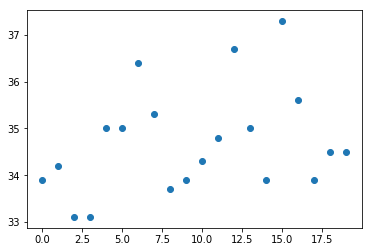

In [109]:
plt.scatter(range(20), s_theta_obs_deg)

In [80]:
# Mean final pose theta (right and left turn)

# Cosine rule
r_theta = np.arccos((2*radius**2 - r_mean**2) / (2 * radius**2))
l_theta = np.arccos((2*radius**2 - l_mean**2) / (2 * radius**2))

r_theta_deg = np.round(np.rad2deg(r_theta), decimals=1)
l_theta_deg = np.round(np.rad2deg(l_theta), decimals=1)

# Only absolute angle between initial pose and mean final pose
print("Right turn motion - Final angular pose", r_theta_deg)
print("Left turn motion - Final angular pose", l_theta_deg)

# Angular deviation in straight motion
s_theta = np.arctan2(sy_mean, sx_mean)
s_theta_deg = np.round(np.rad2deg(s_theta), decimals=1)
print("Straight motion - angular deviation", s_theta_deg)

Right turn motion - Final angular pose 84.5
Left turn motion - Final angular pose 84.6
Straight motion - angular deviation 34.6


### Mean poses of robot

In [81]:
# mean averaged final pose (x, y):
# Straight motion
sx_mean = 40.4
sy_mean = 27.9

# Right-turn motion
rx_mean = 17.8
ry_mean = 2.8

# Left-turn motion
lx_mean = 17.8
ly_mean = 52.9

In [82]:
# Initial pose (x, y):
# Straight motion
sx0_mean = np.round((wheel_Rx0_s + wheel_Lx0_s) / 2, decimals=1)
sy0_mean = np.round((wheel_Ry0_s + wheel_Ly0_s) / 2, decimals=1)

# Right-turn motion
rx0_mean = np.round((wheel_Rx0_r + wheel_Lx0_r) / 2, decimals=1)
ry0_mean = np.round((wheel_Ry0_r + wheel_Ly0_r) / 2, decimals=1)

# Left-turn motion
lx0_mean = np.round((wheel_Rx0_l + wheel_Lx0_l) / 2, decimals=1)
ly0_mean = np.round((wheel_Ry0_l + wheel_Ly0_l) / 2, decimals=1)

# Must be equal since initiated at same position
assert(sx0_mean == rx0_mean == lx0_mean)
assert(sy0_mean == ry0_mean == ly0_mean)

In [83]:
# Mean final pose theta (right and left turn)
rx_th = 17.5; ry_th = 0.5; 
lx_th = 17.5; ly_th = 54.8;
# Mean displacement
r_disp = np.sqrt((rx_th - rx0_mean)**2 + (ry_th - ry0_mean)**2)
l_disp = np.sqrt((lx_th - lx0_mean)**2 + (ly_th - ly0_mean)**2)

#### Analytical angular pose calculations

In [84]:
# Cosine rule
r_th_theta = np.arccos((2*radius**2 - r_disp**2) / (2 * radius**2))
l_th_theta = np.arccos((2*radius**2 - l_disp**2) / (2 * radius**2))

r_th_theta_deg = np.round(np.rad2deg(r_th_theta), decimals=1)
l_th_theta_deg = np.round(np.rad2deg(l_th_theta), decimals=1)

# Only absolute angle between initial pose and mean final pose
print("Right turn motion - Final angular pose", r_th_theta_deg)
print("Left turn motion - Final angular pose", l_th_theta_deg)

Right turn motion - Final angular pose 90.7
Left turn motion - Final angular pose 89.8


## Statistical Evaluation

### Mean deviation calculations

In [85]:
display('Mean distance travelled')

print('Left turn motion:')
print('right wheel (x, y):', l_rx_distance_mean, l_ry_distance_mean)
print('left wheel (x, y):', l_lx_distance_mean, l_ly_distance_mean)

print('\nRight turn motion:')
print('right wheel (x, y):', r_rx_distance_mean, r_ry_distance_mean)
print('left wheel (x, y):', r_lx_distance_mean, r_ly_distance_mean)

print('\nStraight motion:')
print('right wheel (x, y):', s_rx_distance_mean, s_ry_distance_mean)
print('left wheel (x, y):', s_lx_distance_mean, s_ly_distance_mean)

'Mean distance travelled'

Left turn motion:
right wheel (x, y): 24.9 30.9
left wheel (x, y): 10.6 19.2

Right turn motion:
right wheel (x, y): 10.7 19.1
left wheel (x, y): 24.8 30.9

Straight motion:
right wheel (x, y): 40.5 0.4
left wheel (x, y): 40.3 0.4


In [86]:
display('Mean final position')

print('Left turn motion:')
print('right wheel (x, y):',
      np.round(np.mean(wheel_Rx_l), decimals=1),
      np.round(np.mean(wheel_Ry_l), decimals=1))
print('left wheel (x, y):',
      np.round(np.mean(wheel_Lx_l), decimals=1),
      np.round(np.mean(wheel_Ly_l), decimals=1))

print('\nRight turn motion:')
print('right wheel (x, y):',
      np.round(np.mean(wheel_Rx_r), decimals=1),
      np.round(np.mean(wheel_Ry_r), decimals=1))
print('left wheel (x, y):',
      np.round(np.mean(wheel_Lx_r), decimals=1),
      np.round(np.mean(wheel_Ly_r), decimals=1))

print('\nStraight motion:')
print('right wheel (x, y):',
      np.round(np.mean(wheel_Rx_s), decimals=1),
      np.round(np.mean(wheel_Ry_s), decimals=1))
print('left wheel (x, y):',
      np.round(np.mean(wheel_Lx_s), decimals=1),
      np.round(np.mean(wheel_Ly_s), decimals=1))

'Mean final position'

Left turn motion:
right wheel (x, y): 24.9 51.5
left wheel (x, y): 10.6 54.3

Right turn motion:
right wheel (x, y): 10.7 1.5
left wheel (x, y): 24.8 4.2

Straight motion:
right wheel (x, y): 40.5 20.7
left wheel (x, y): 40.3 35.2


In [87]:
# Left-turn
l_rx_dm = np.round(abs(l_rx_distance_mean - l_rx0_distance), decimals=1)
l_ry_dm = np.round(abs(l_ry_distance_mean - l_ry0_distance), decimals=1)
l_lx_dm = np.round(abs(l_lx_distance_mean - l_lx0_distance), decimals=1)
l_ly_dm = np.round(abs(l_ly_distance_mean - l_ly0_distance), decimals=1)

# Right turn
r_rx_dm = np.round(abs(r_rx_distance_mean - r_rx0_distance), decimals=1)
r_ry_dm = np.round(abs(r_ry_distance_mean - r_ry0_distance), decimals=1)
r_lx_dm = np.round(abs(r_lx_distance_mean - r_lx0_distance), decimals=1)
r_ly_dm = np.round(abs(r_ly_distance_mean - r_ly0_distance), decimals=1)

# straight
s_rx_dm = np.round(abs(s_rx_distance_mean - s_rx0_distance), decimals=1)
s_ry_dm = np.round(abs(s_ry_distance_mean - s_ry0_distance), decimals=1)
s_lx_dm = np.round(abs(s_lx_distance_mean - s_lx0_distance), decimals=1)
s_ly_dm = np.round(abs(s_ly_distance_mean - s_ly0_distance), decimals=1)

In [88]:
display('Mean deviation in distance travelled')

print('Left turn motion:')
print('right wheel (x, y):', l_rx_dm, l_ry_dm)
print('left wheel (x, y):',
      np.round(abs(l_lx_distance_mean - l_lx0_distance), decimals=1),
      np.round(abs(l_ly_distance_mean - l_ly0_distance), decimals=1))

print('\nRight turn motion:')
print('right wheel (x, y):',
      np.round(abs(r_rx_distance_mean - r_rx0_distance), decimals=1),
      np.round(abs(r_ry_distance_mean - r_ry0_distance), decimals=1))
print('left wheel (x, y):',
      np.round(abs(r_lx_distance_mean - r_lx0_distance), decimals=1),
      np.round(abs(r_ly_distance_mean - r_ly0_distance), decimals=1))

print('\nStraight motion:')
print('right wheel (x, y):',
      np.round(abs(s_rx_distance_mean - s_rx0_distance), decimals=1),
      np.round(abs(s_ry_distance_mean - s_ry0_distance), decimals=1))
print('left wheel (x, y):',
      np.round(abs(s_lx_distance_mean - s_lx0_distance), decimals=1),
      np.round(abs(s_ly_distance_mean - s_ly0_distance), decimals=1))

'Mean deviation in distance travelled'

Left turn motion:
right wheel (x, y): 0.1 0.9
left wheel (x, y): 0.6 0.8

Right turn motion:
right wheel (x, y): 0.7 0.9
left wheel (x, y): 0.2 0.9

Straight motion:
right wheel (x, y): 0.0 0.4
left wheel (x, y): 0.2 0.4


#### Mean angular deviation in robot final pose

In [89]:
display('Mean angular deviation in robot final pose')

print('Left turn motion:')
print('right wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(l_ry_distance_mean), decimals=1),
                           np.round(abs(l_rx_distance_mean), decimals=1))
                     - atan2(abs(l_ry0_distance), abs(l_rx0_distance)))), decimals=2))
print('left wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(l_ly_distance_mean), decimals=1),
                           np.round(abs(l_lx_distance_mean), decimals=1))
                     - atan2(abs(l_ly0_distance), abs(l_lx0_distance)))), decimals=1))

print('\nRight turn motion:')
print('right wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(r_ry_distance_mean), decimals=1),
                           np.round(abs(r_rx_distance_mean), decimals=1))
                     - atan2(abs(r_ry0_distance), abs(r_rx0_distance)))), decimals=1))
print('left wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(r_ly_distance_mean), decimals=1),
                           np.round(abs(r_lx_distance_mean), decimals=1))
                     - atan2(abs(r_ly0_distance), abs(r_lx0_distance)))), decimals=1))

print('\nStraight motion:')
print('right wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(s_ry_distance_mean), decimals=1),
                           np.round(abs(s_rx_distance_mean), decimals=1))
                     - atan2(abs(s_ry0_distance), abs(s_rx0_distance)))), decimals=1))
print('left wheel (degrees):',
      np.round(abs(np.degrees(atan2(s_ly_distance_mean, s_lx_distance_mean)
                     - atan2(abs(s_ly0_distance), abs(s_lx0_distance)))), decimals=1))

'Mean angular deviation in robot final pose'

Left turn motion:
right wheel (degrees): 0.94
left wheel (degrees): 2.3

Right turn motion:
right wheel (degrees): 2.7
left wheel (degrees): 1.1

Straight motion:
right wheel (degrees): 0.6
left wheel (degrees): 0.6


### Standard deviation calculations

In [90]:
display('Standard Deviation in final pose of robot')

print('Left turn motion:')
print('right wheel (x, y):',
      np.round(np.std(wheel_Rx_l), decimals=1),
      np.round(np.std(wheel_Ry_l), decimals=1))
print('left wheel (x, y):',
      np.round(np.std(wheel_Lx_l), decimals=1),
      np.round(np.std(wheel_Ly_l), decimals=1))

print('\nRight turn motion:')
print('right wheel (x, y):',
      np.round(np.std(wheel_Rx_r), decimals=1),
      np.round(np.std(wheel_Ry_r), decimals=1))
print('left wheel (x, y):',
      np.round(np.std(wheel_Lx_r), decimals=1),
      np.round(np.std(wheel_Ly_r), decimals=1))

print('\nStraight motion:')
print('right wheel (x, y):',
      np.round(np.std(wheel_Rx_s), decimals=1),
      np.round(np.std(wheel_Ry_s), decimals=1))
print('left wheel (x, y):',
      np.round(np.std(wheel_Lx_s), decimals=1),
      np.round(np.std(wheel_Ly_s), decimals=1))

'Standard Deviation in final pose of robot'

Left turn motion:
right wheel (x, y): 0.3 0.3
left wheel (x, y): 0.3 0.3

Right turn motion:
right wheel (x, y): 0.3 0.2
left wheel (x, y): 0.4 0.5

Straight motion:
right wheel (x, y): 0.2 0.5
left wheel (x, y): 0.3 0.5


## Data Visualization

### Distribution of poses

In [91]:
def plot_data(rx, ry, lx, ly, rx0, ry0, lx0, ly0, whichData, save_fig=True):
    rx_mean = rx.mean()
    ry_mean = ry.mean()
    lx_mean = lx.mean()
    ly_mean = ly.mean()

    # fig, ax = plt.subplots()
    fig = plt.figure(figsize=(10, 10))
    ax = plt.gca()
    Rwheel = ax.scatter(rx, ry, c='g', label=('right wheel'.format(whichData)))
    Lwheel = ax.scatter(lx, ly, c='b', label=('left wheel'.format(whichData)))
    Rwheel_mean = ax.scatter(rx_mean, ry_mean, c='r', marker='x',\
                                      label=('right wheel mean value'.format(whichData)))
    Lwheel_mean = ax.scatter(lx_mean, ly_mean, c='r', marker='x',\
                                      label=('left wheel mean value'.format(whichData)))
    Rwheel_init = ax.scatter(rx0, ry0, c='g', marker='+',
                             label=('right wheel initial'.format(whichData)))
    Lwheel_init = ax.scatter(lx0, ly0, c='b', marker='+',\
                             label=('left wheel initial'.format(whichData)))

    # Setup of zoom-in figure and legend position
    if whichData == 'Straight':
        ax.legend(loc=1)
        axin_r = zoomed_inset_axes(ax, 8, loc=8)
        mark_inset(ax, axin_r, loc1=4, loc2=2, fc="none", ec="0.5")
        axin_l = zoomed_inset_axes(ax, 8, loc=9)
        mark_inset(ax, axin_l, loc1=1, loc2=3, fc="none", ec="0.5")
    elif whichData == 'Right-turn':
        ax.legend(loc=2)
        axin_r = zoomed_inset_axes(ax, 8, loc=1)
        mark_inset(ax, axin_r, loc1=4, loc2=2, fc="none", ec="0.5")
        axin_l = zoomed_inset_axes(ax, 8, loc=4)
        mark_inset(ax, axin_l, loc1=2, loc2=3, fc="none", ec="0.5")
    elif whichData == 'Left-turn':
        ax.legend(loc=3)
        axin_r = zoomed_inset_axes(ax, 8, loc=1)
        mark_inset(ax, axin_r, loc1=2, loc2=3, fc="none", ec="0.5")
        axin_l = zoomed_inset_axes(ax, 8, loc=4)
        mark_inset(ax, axin_l, loc1=1, loc2=3, fc="none", ec="0.5")
    
    # Plot into zoom-in figures
    axin_r.scatter(rx, ry, c='g', label=('right wheel'.format(whichData)))
    axin_r.scatter(rx_mean, ry_mean, c='r', marker='x',
                   label=('right wheel mean value'.format(whichData)))
    sb.kdeplot(rx, ry, ax=axin_r)
    axin_r.set_xlim(rx_mean-1.5, rx_mean+1.5)
    axin_r.set_ylim(ry_mean-1.5, ry_mean+1.5)

    axin_l.scatter(lx, ly, c='b', label=('left wheel'.format(whichData)))
    axin_l.scatter(lx_mean, ly_mean, c='r', marker='x',
                   label=('left wheel mean value'.format(whichData)))
    sb.kdeplot(lx, ly, ax=axin_l)
    axin_l.set_xlim(lx_mean-1.5, lx_mean+1.5)
    axin_l.set_ylim(ly_mean-1.5, ly_mean+1.5)
    
    # Labels
    title = whichData+' motion of Lego robot'
    ax.set_title(title)
    ax.set_xlabel('distance x (cm)')
    ax.set_ylabel('distance y (cm)')
    
    # Figure aspects 
    ax.set_aspect('equal')
    ax.set_xlim(-10, 60)
    ax.set_ylim(-10, 60)
    ax.grid(color='b', linestyle='-', linewidth=.1)
    
    if save_fig:
        fig.savefig('images/'+whichData)

    plt.show()
    plt.close()

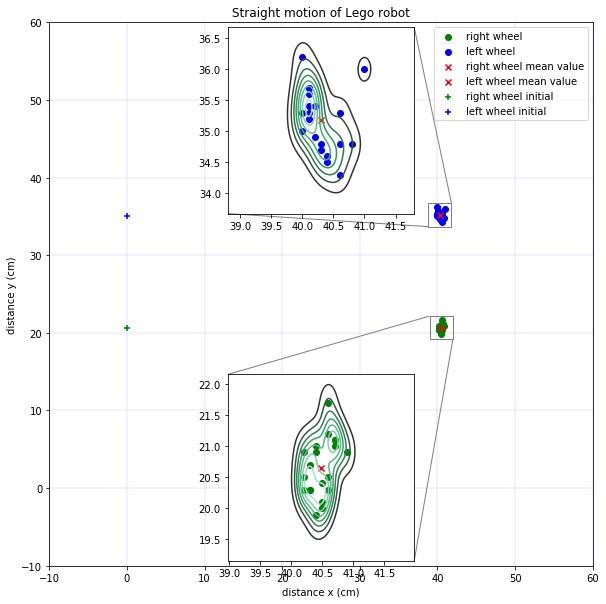

In [92]:
plot_data(wheel_Rx_s, wheel_Ry_s, wheel_Lx_s, wheel_Ly_s,
          wheel_Rx0_s, wheel_Ry0_s, wheel_Lx0_s, wheel_Ly0_s,
          whichData='Straight')

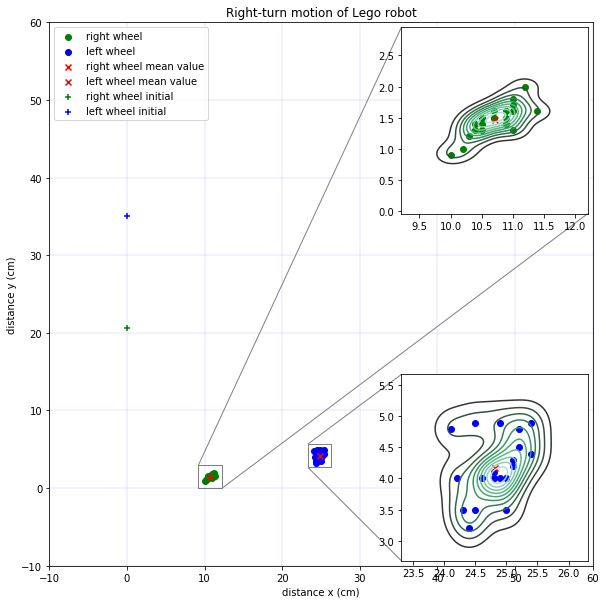

In [93]:
plot_data(wheel_Rx_r, wheel_Ry_r, wheel_Lx_r, wheel_Ly_r,
          wheel_Rx0_r, wheel_Ry0_r, wheel_Lx0_r, wheel_Ly0_r,
          whichData='Right-turn')

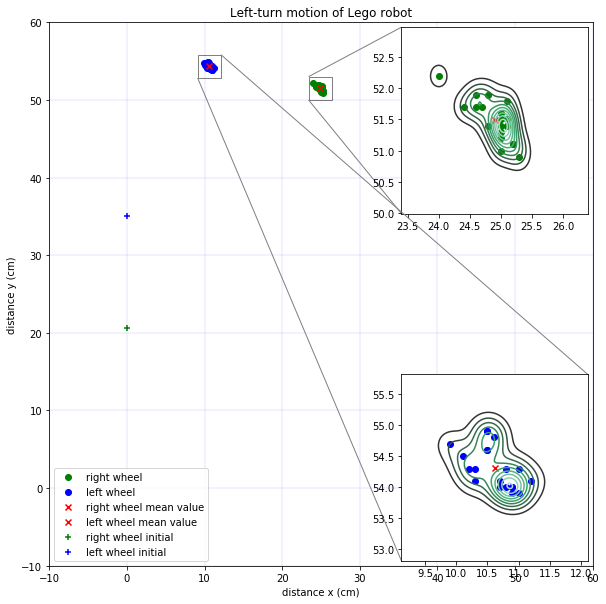

In [94]:
plot_data(wheel_Rx_l, wheel_Ry_l, wheel_Lx_l, wheel_Ly_l,
          wheel_Rx0_l, wheel_Ry0_l, wheel_Lx0_l, wheel_Ly0_l,
          whichData='Left-turn')

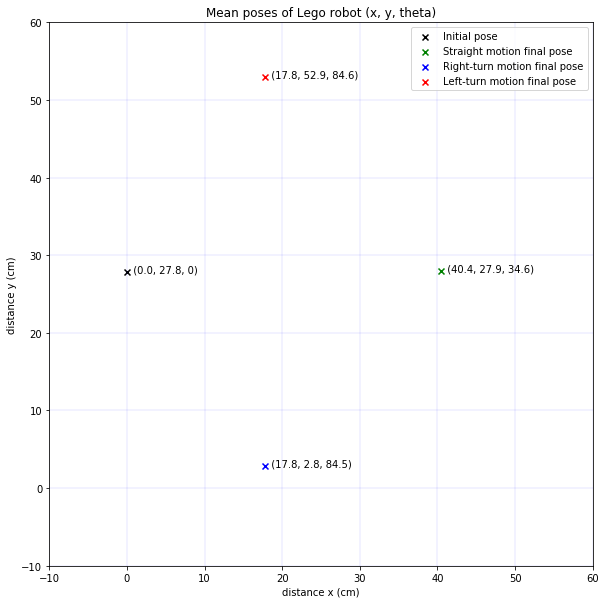

In [95]:
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

init_mean = ax.scatter(sx0_mean, sy0_mean, c='k', marker='x',\
                       label='Initial pose')
straight_mean = ax.scatter(sx_mean, sy_mean, c='g', marker='x',\
                       label='Straight motion final pose')
right_mean = ax.scatter(rx_mean, ry_mean, c='b', marker='x',\
                       label='Right-turn motion final pose')
left_mean = ax.scatter(lx_mean, ly_mean, c='r', marker='x',\
                       label='Left-turn motion final pose')

# Annotation
i_label = '  ('+ str(sx0_mean) + ', ' + str(sy0_mean) + ', 0' +')'
s_label = '  ('+ str(sx_mean) + ', ' + str(sy_mean) + ', ' + str(s_theta_deg) +')'
r_label = '  ('+ str(rx_mean) + ', ' + str(ry_mean) + ', ' + str(r_theta_deg) +')'
l_label = '  ('+ str(lx_mean) + ', ' + str(ly_mean) + ', ' + str(l_theta_deg) +')'
plt.annotate(i_label, xy = (sx0_mean, sy0_mean))
plt.annotate(s_label, xy = (sx_mean, sy_mean))
plt.annotate(r_label, xy = (rx_mean, ry_mean))
plt.annotate(l_label, xy = (lx_mean, ly_mean))


# Legends
ax.legend(loc=1)

# Labels
title = 'Mean poses of Lego robot (x, y, theta)'
ax.set_title(title)
ax.set_xlabel('distance x (cm)')
ax.set_ylabel('distance y (cm)')

# Figure aspects 
ax.set_aspect('equal')
ax.set_xlim(-10, 60)
ax.set_ylim(-10, 60)
ax.grid(color='b', linestyle='-', linewidth=.1)
    
fig.savefig('images/mean_poses')

plt.show()
plt.close()

## Gaussian fits

### Gaussian fit for 1-dimensional data

In [96]:
from sklearn.neighbors import KernelDensity

In [97]:
motions = ['Straight ', 'Right-turn ', 'Left-turn ']

In [98]:
wheels = ['left-wheel ', 'right-wheel ']

In [99]:
def get_distribution(data, num_samples=500):
    x = np.linspace(-10, 60, num_samples)
    samples = data[np.newaxis].T

    kernel = KernelDensity(bandwidth=1.5).fit(samples)
    log_dens = kernel.score_samples(x[:, np.newaxis])

    return x, np.exp(log_dens)

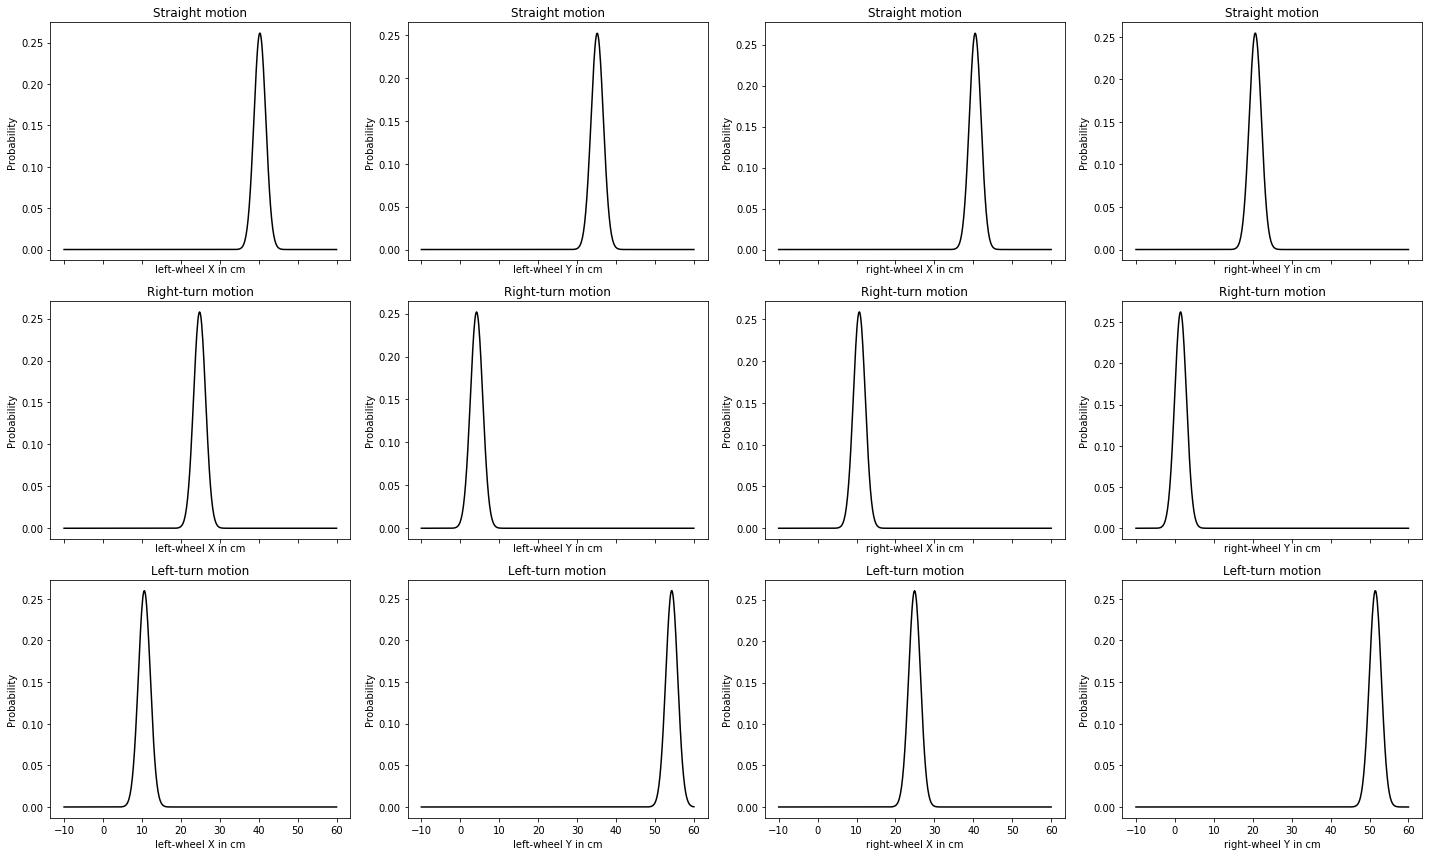

In [100]:
f, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True)

# Straight motion
x, y = get_distribution(wheel_Lx_s)
axes[0,0].plot(x, y, color='black')
axes[0,0].set_xlabel(wheels[0]+'X in cm')
axes[0,0].set_ylabel('Probability')
axes[0,0].set_title(motions[0] + 'motion')

x, y = get_distribution(wheel_Ly_s)
axes[0,1].plot(x, y, color='black')
axes[0,1].set_xlabel(wheels[0]+'Y in cm')
axes[0,1].set_ylabel('Probability')
axes[0,1].set_title(motions[0] + 'motion')

x, y = get_distribution(wheel_Rx_s)
axes[0,2].plot(x, y, color='black')
axes[0,2].set_xlabel(wheels[1]+'X in cm')
axes[0,2].set_ylabel('Probability')
axes[0,2].set_title(motions[0] + 'motion')

x, y = get_distribution(wheel_Ry_s)
axes[0,3].plot(x, y, color='black')
axes[0,3].set_xlabel(wheels[1]+'Y in cm')
axes[0,3].set_ylabel('Probability')
axes[0,3].set_title(motions[0] + 'motion')

# Right Turn motion
x, y = get_distribution(wheel_Lx_r)
axes[1,0].plot(x, y, color='black')
axes[1,0].set_xlabel(wheels[0]+'X in cm')
axes[1,0].set_ylabel('Probability')
axes[1,0].set_title(motions[1] + 'motion')

x, y = get_distribution(wheel_Ly_r)
axes[1,1].plot(x, y, color='black')
axes[1,1].set_xlabel(wheels[0]+'Y in cm')
axes[1,1].set_ylabel('Probability')
axes[1,1].set_title(motions[1] + 'motion')

x, y = get_distribution(wheel_Rx_r)
axes[1,2].plot(x, y, color='black')
axes[1,2].set_xlabel(wheels[1]+'X in cm')
axes[1,2].set_ylabel('Probability')
axes[1,2].set_title(motions[1] + 'motion')

x, y = get_distribution(wheel_Ry_r)
axes[1,3].plot(x, y, color='black')
axes[1,3].set_xlabel(wheels[1]+'Y in cm')
axes[1,3].set_ylabel('Probability')
axes[1,3].set_title(motions[1] + 'motion')

# Left turn motion
x, y = get_distribution(wheel_Lx_l)
axes[2,0].plot(x, y, color='black')
axes[2,0].set_xlabel(wheels[0]+'X in cm')
axes[2,0].set_ylabel('Probability')
axes[2,0].set_title(motions[2] + 'motion')

x, y = get_distribution(wheel_Ly_l)
axes[2,1].plot(x, y, color='black')
axes[2,1].set_xlabel(wheels[0]+'Y in cm')
axes[2,1].set_ylabel('Probability')
axes[2,1].set_title(motions[2] + 'motion')

x, y = get_distribution(wheel_Rx_l)
axes[2,2].plot(x, y, color='black')
axes[2,2].set_xlabel(wheels[1]+'X in cm')
axes[2,2].set_ylabel('Probability')
axes[2,2].set_title(motions[2] + 'motion')

x, y = get_distribution(wheel_Ry_l)
axes[2,3].plot(x, y, color='black')
axes[2,3].set_xlabel(wheels[1]+'Y in cm')
axes[2,3].set_ylabel('Probability')
axes[2,3].set_title(motions[2] + 'motion')

f.savefig('images/gaussian_fits')
plt.tight_layout()
plt.show()
plt.close()

### Final Pose distribution of data

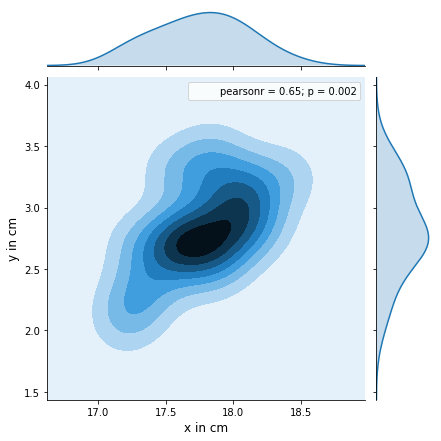

In [101]:
right_motion_distribution = sb.jointplot(right_motion_x, right_motion_y, kind='kde')
right_motion_distribution.set_axis_labels('x in cm', 'y in cm', fontsize=12)
right_motion_distribution.savefig('images/right_motion_distribution')

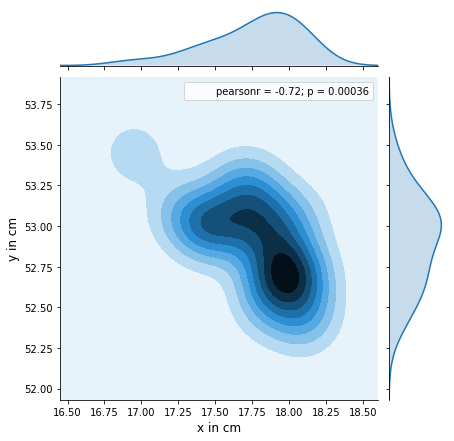

In [102]:
left_motion_distribution = sb.jointplot(left_motion_x, left_motion_y, kind='kde');
left_motion_distribution.set_axis_labels('x in cm', 'y in cm', fontsize=12)
left_motion_distribution.savefig('images/left_motion_distribution')

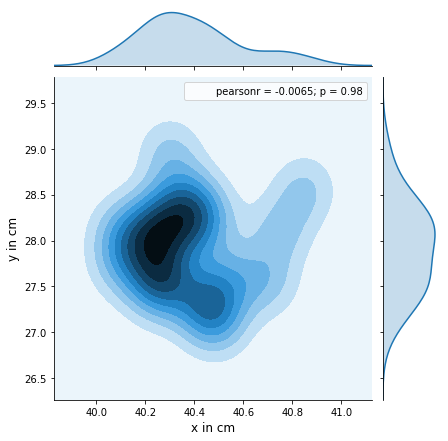

In [103]:
straight_motion_distribution = sb.jointplot(straight_motion_x, straight_motion_y, kind='kde');
straight_motion_distribution.set_axis_labels('x in cm', 'y in cm', fontsize=12)
straight_motion_distribution.savefig('images/straight_motion_distribution')

In [104]:
# Angular position calculation

